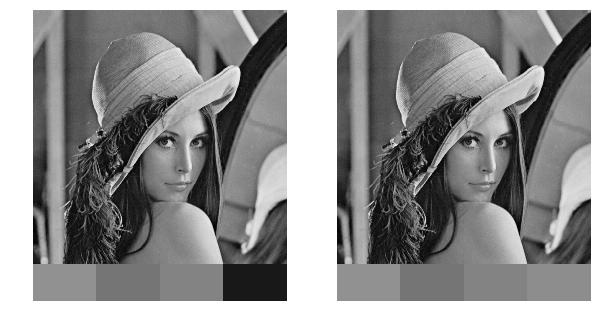

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import cv2



def colorbar(img, k):
    img = np.array(img)
    cnt = np.zeros(256)
#     print(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            cnt[img[i][j]]+=1
    maxi = -1
#     k = 10
    ans = []
    for j in range(k):
        maxi = -1
        for i in range(256):
            if cnt[i] > maxi:
                maxi = cnt[i]
                ind = i
        cnt[ind] = -2
        for i in range(3):
            cnt[ind+i+1] = -2
            cnt[ind-i-1] = -2
        ans.append(ind)
#     print(np.size(ans))
    w = img.shape[1]
    h = img.shape[0]
    new_img = np.empty((h+75,w))

    new_img[0:h, 0:w] = img
    # new_img[h:h+3, 0:w, :] = color[:]
    for i in range(k):
        new_img[h:h+75, i*(w//k):(i+1)*(w//k)] = ans[i]
    new_img = new_img.astype('uint8')
#     print(ans)
    return new_img

def linContrastStretching(img, a, b):
    img = np.array(img)
    img1 = ((img-np.min(img))/(np.max(img)-np.min(img)))*(b-a)
    # print(np.min(img))
    # plt.imshow(img, cmap='gray')
    image = Image.fromarray(img).convert('L')
    image1 = Image.fromarray(img1).convert('L')

#     fig = plt.figure(figsize=[20, 20])
#     ax1 = fig.add_subplot(2,2,1)
#     ax2 = fig.add_subplot(2,2,2)
#     ax3 = fig.add_subplot(2,2,3)
#     ax4 = fig.add_subplot(2,2,4)
#     ax1.imshow(img, cmap='gray');ax1.axis('off')
#     ax2.imshow(image1, cmap='gray');ax2.axis('off')
#     ax3.hist(img.flatten(), bins=256)
#     ax4.hist(img1.flatten(), bins=(b-a))
    
    return image1

img = Image.open('../input/lena.jpg').convert('L')
k = 4
img_old = colorbar(img, k)
img_new = linContrastStretching(img, 0, 255)
img_new = colorbar(img_new, k)

fig = plt.figure(figsize=[10,10])
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.imshow(img_old, cmap='gray');ax1.axis('off')
ax2.imshow(img_new, cmap='gray');ax2.axis('off')
plt.show()
# plt.imshow(new_img, cmap='gray');plt.axis('off')

The colorbars have become lighter as compared after stretching as after linearly transforming the image<br>the intensities of colours reduce by some minor amount.